In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)

x_train = np.array([1.0, 1.5, 2.0])
y_train = np.array([300.0, 400.0, 500.0])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1.  1.5 2. ]
y_train = [300. 400. 500.]


In [60]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")

m = x_train.shape[0]

print(f"Number of training examples is: {m}")

x_train.shape: (3,)
Number of training examples is: 3


In [61]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


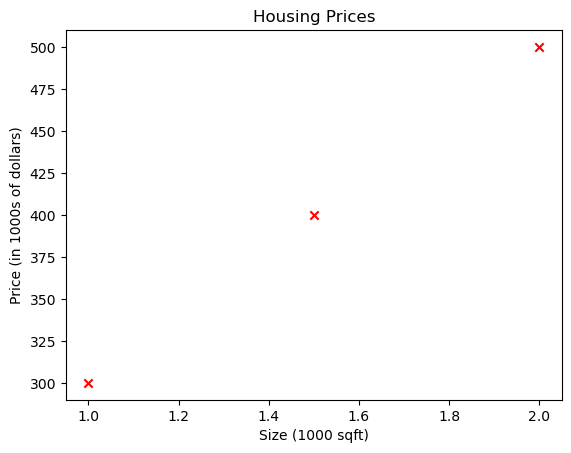

In [62]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Housing Prices")

# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')

# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [63]:
a = 100
b = 100
print(f"w: {a}")
print(f"b: {b}")

w: 100
b: 100


In [64]:
def compute_model_output(x, a, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_ab = np.zeros(m)
    for i in range(m):
        f_ab[i] = a * x[i] + b
        
    return f_ab

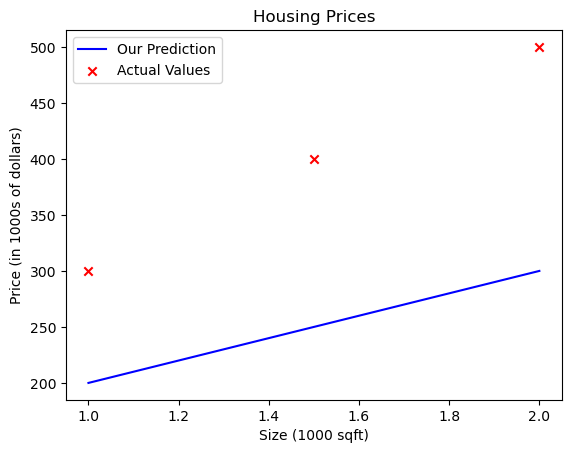

In [65]:
tmp_f_ab = compute_model_output(x_train, a, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_ab, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [66]:
a = 100                         
b = 50 

x_i = 1.5

cost_1200sqft = a * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$200 thousand dollars


# Home Work 1

# Objective


## 1- Implement the cost function

In [67]:
#implement the cost function
def compute_cost(x, y, a, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        cost += (a * x[i] + b - y[i])**2
    cost = cost / (2 * m)
    return cost

In [68]:
# Test the cost function
cost = compute_cost(x_train, y_train, a, b)
print(f"Cost: {cost:.2f}")

Cost: 20833.33


## 2- Implement the Gradient Descent algorithm

In [69]:
# implement the gradient descent algorithm
def gradient_descent(x, y, a, b, alpha, num_iters):
    m = x.shape[0]
    for i in range(num_iters):
        a_grad = 0
        b_grad = 0
        for j in range(m):
            a_grad += (a * x[j] + b - y[j]) * x[j]
            b_grad += (a * x[j] + b - y[j])
        a = a - alpha * a_grad / m
        b = b - alpha * b_grad / m
        cost = compute_cost(x, y, a, b)
        print(f"Iteration {i+1}/{num_iters}: a={a:.2f}, b={b:.2f}, cost={cost:.2f}")
    return a, b, cost

In [70]:
# Test the gradient descent algorithm
a = 100
b = 100
alpha = 0.1
num_iters = 964
a, b, cost = gradient_descent(x_train, y_train, a, b, alpha, num_iters)
print(f"a: {a:.2f}, b: {b:.2f}, cost: {cost:.2f}")

Iteration 1/964: a=124.17, b=115.00, cost=5355.01
Iteration 2/964: a=140.24, b=124.88, cost=2394.53
Iteration 3/964: a=150.95, b=131.35, cost=1091.70
Iteration 4/964: a=158.10, b=135.57, cost=518.16
Iteration 5/964: a=162.89, b=138.30, cost=265.45
Iteration 6/964: a=166.12, b=140.04, cost=153.91
Iteration 7/964: a=168.30, b=141.12, cost=104.47
Iteration 8/964: a=169.79, b=141.76, cost=82.35
Iteration 9/964: a=170.83, b=142.11, cost=72.26
Iteration 10/964: a=171.56, b=142.28, cost=67.47
Iteration 11/964: a=172.09, b=142.32, cost=65.01
Iteration 12/964: a=172.49, b=142.27, cost=63.58
Iteration 13/964: a=172.80, b=142.17, cost=62.60
Iteration 14/964: a=173.05, b=142.03, cost=61.83
Iteration 15/964: a=173.25, b=141.87, cost=61.15
Iteration 16/964: a=173.44, b=141.70, cost=60.52
Iteration 17/964: a=173.60, b=141.51, cost=59.91
Iteration 18/964: a=173.75, b=141.32, cost=59.31
Iteration 19/964: a=173.90, b=141.13, cost=58.72
Iteration 20/964: a=174.04, b=140.93, cost=58.14
Iteration 21/964: a

[300.13858697 400.01872543 499.89886388] 199.76027691706994 100.37831005014382


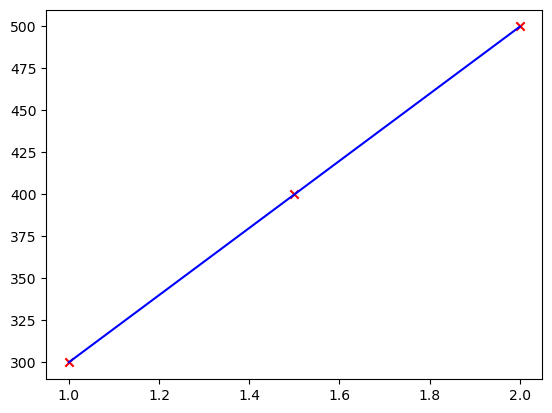

In [71]:
# Plot our model prediction
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
# use a, b to plot the model
f_ab = compute_model_output(x_train, a, b)

print(f_ab, a, b)
plt.plot(x_train, f_ab, c='b',label='Our Prediction')

In [72]:
# check the score of the model
predection = f_ab
actual = y_train
score = 1 - (np.sum((predection - actual)**2) / np.sum((actual - np.mean(actual))**2))
print(f"Model Score: {score:.2f}")
print(predection, actual)

Model Score: 1.00
[300.13858697 400.01872543 499.89886388] [300. 400. 500.]


## 3- Implemet Linear Regression with One and Multivariable.

In [73]:
# implement the linear regression algorithm with one and multiple variables
def linear_regression(x, y, alpha, num_iters):
    a = 0
    b = 0
    m = x.shape[0]
    for i in range(num_iters):
        a_grad = 0
        b_grad = 0
        for j in range(m):
            a_grad += (a * x[j] + b - y[j]) * x[j]
            b_grad += (a * x[j] + b - y[j])
        a = a - alpha * a_grad / m
        b = b - alpha * b_grad / m
        cost = compute_cost(x, y, a, b)
        print(f"Iteration {i+1}/{num_iters}: a={a:.2f}, b={b:.2f}, cost={cost:.2f}")
    return a, b, cost

In [74]:
# Test the linear regression algorithm
alpha = 0.1
num_iters = 964
a, b, cost = linear_regression(x_train, y_train, alpha, num_iters)
print(f"a: {a:.2f}, b: {b:.2f}, cost: {cost:.2f}")


Iteration 1/964: a=63.33, b=40.00, cost=36668.98
Iteration 2/964: a=105.36, b=66.50, cost=16139.19
Iteration 3/964: a=133.26, b=84.05, cost=7107.15
Iteration 4/964: a=151.78, b=95.65, cost=3133.49
Iteration 5/964: a=164.09, b=103.32, cost=1385.24
Iteration 6/964: a=172.27, b=108.38, cost=616.03
Iteration 7/964: a=177.71, b=111.70, cost=277.56
Iteration 8/964: a=181.34, b=113.87, cost=128.59
Iteration 9/964: a=183.77, b=115.28, cost=62.99
Iteration 10/964: a=185.40, b=116.19, cost=34.06
Iteration 11/964: a=186.50, b=116.76, cost=21.27
Iteration 12/964: a=187.25, b=117.11, cost=15.58
Iteration 13/964: a=187.76, b=117.31, cost=13.02
Iteration 14/964: a=188.12, b=117.41, cost=11.83
Iteration 15/964: a=188.38, b=117.45, cost=11.25
Iteration 16/964: a=188.57, b=117.45, cost=10.93
Iteration 17/964: a=188.72, b=117.42, cost=10.73
Iteration 18/964: a=188.83, b=117.37, cost=10.59
Iteration 19/964: a=188.92, b=117.31, cost=10.47
Iteration 20/964: a=189.00, b=117.24, cost=10.35
Iteration 21/964: a

[300.05846808 400.00790002 499.95733196] 199.89886388428377 100.15960419222178


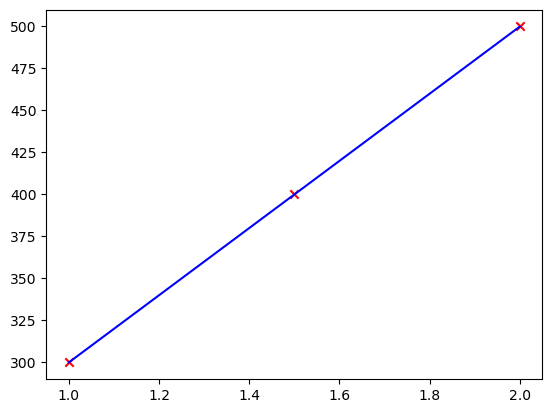

In [75]:
# Plot our model prediction
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
# use a, b to plot the model
f_ab = compute_model_output(x_train, a, b)

print(f_ab, a, b)
plt.plot(x_train, f_ab, c='b',label='Our Prediction')


In [76]:
predection = f_ab
actual = y_train
score = 1 - (np.sum((predection - actual)**2) / np.sum((actual - np.mean(actual))**2))
print(f"Model Score: {score:.2f}")
print(predection, actual)


Model Score: 1.00
[300.05846808 400.00790002 499.95733196] [300. 400. 500.]
